<a href="https://colab.research.google.com/github/KhumairahErnas/Kelompok-13_Pabudu-UAS-AI/blob/main/UAS_AI_Kelompok_13_Pabudu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kelompok Pabudu

Anggota Kelompok :
1. Diajeng Ganis Samantha M (202255202019)
2. Indah Purnama Sari (202255202010)
3. Khumairah Awaliyah Ernas (202255202068)

Case yang diangakat : Klasifikasi Harga Ponsel Menggunakan Algoritma Random Forest

Algoritma yang digunakan dalam klasifikasi yaitu Random Forest.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix,precision_score,jaccard_score,recall_score,f1_score,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
import os
from warnings import filterwarnings
import warnings
warnings.filterwarnings("ignore")
os.environ["PYTHONWARNINGS"] = "ignore"

2. Pre Processing

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/UAS AI /train.csv")

In [ ]:
df = pd.DataFrame(data)
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
#mengurutkan nilai berdasarkan target kita

df.sort_values(by='price_range' , inplace = True)

In [ ]:
#memeriksa nilai duplikat

print(len(df[df.duplicated()]))

0


In [ ]:
#Memeriksa NANs :

df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
#Memeriksa apakah kolom telah terisi dengan benar
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 1838 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_scre

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [ ]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [ ]:
#Memisahkan kolom diskrit dan kontinyu
discrete = ['blue' ,'dual_sim' , 'four_g' , 'three_g' , 'touch_screen' , 'wifi' , 'n_cores']
continuous = ['battery_power' , 'clock_speed' , 'fc', 'n_cores', 'int_memory' , 'mobile_wt', 'm_dep' , 'px_height' , 'px_width' , 'ram' ,
             'talk_time' , 'pc' , 'sc_h' , 'sc_w']

#using for better visualization
continuous1 =  ['battery_power' , 'px_height' , 'px_width' , 'ram']
continuous2 = ['clock_speed' , 'fc', 'n_cores', 'int_memory' , 'mobile_wt', 'm_dep', 'talk_time' , 'pc' , 'sc_h' , 'sc_w']

In [ ]:
#Nilai kolom diskrit

for i in discrete :

    uniques = df[i].unique()
    sorted_unique = np.sort(uniques)
    print(f' {i} : {sorted_unique}')

 blue : [0 1]
 dual_sim : [0 1]
 four_g : [0 1]
 three_g : [0 1]
 touch_screen : [0 1]
 wifi : [0 1]
 n_cores : [1 2 3 4 5 6 7 8]


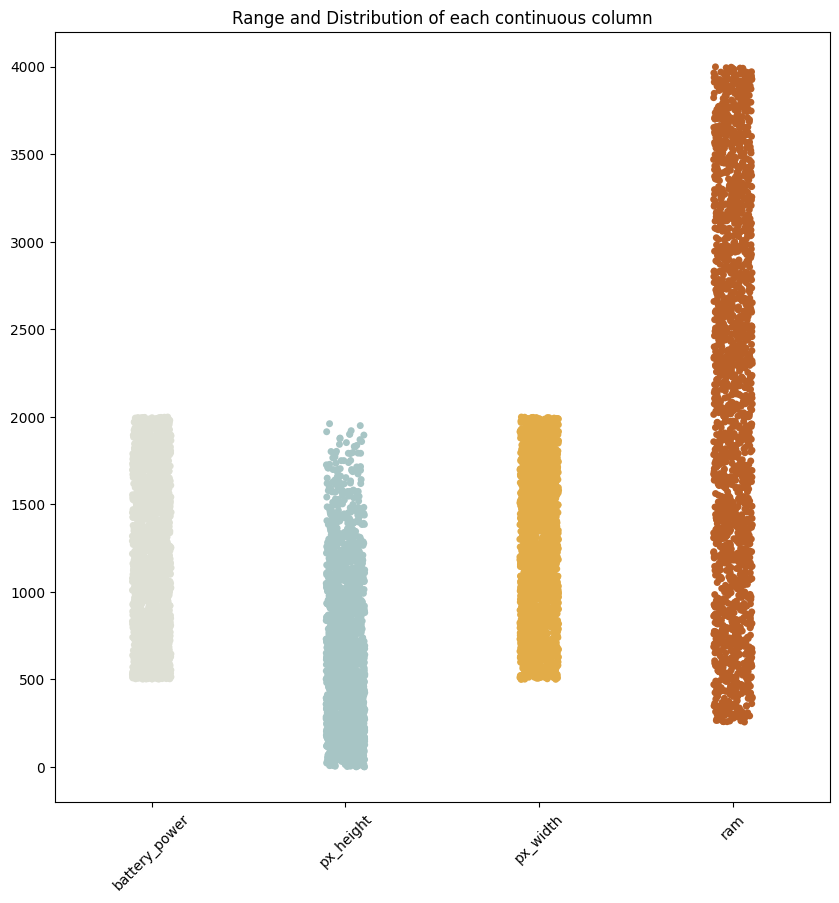

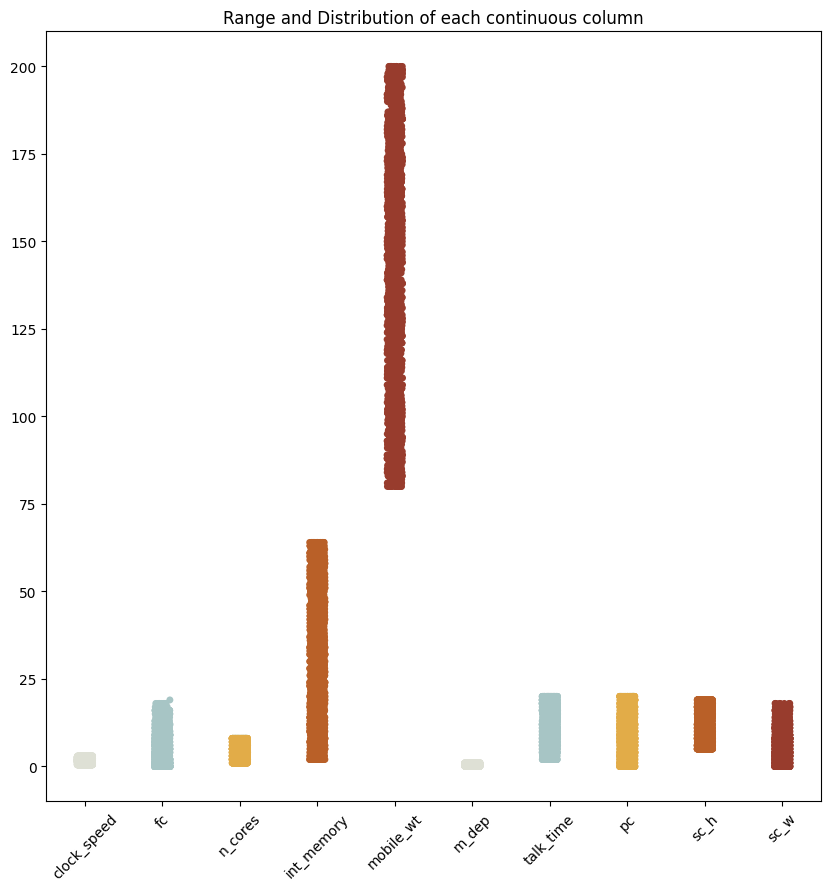

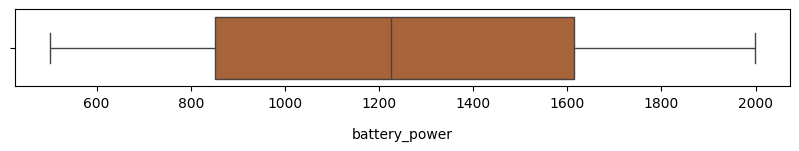

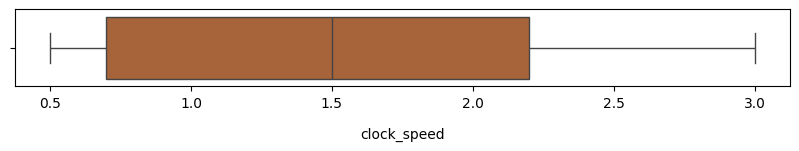

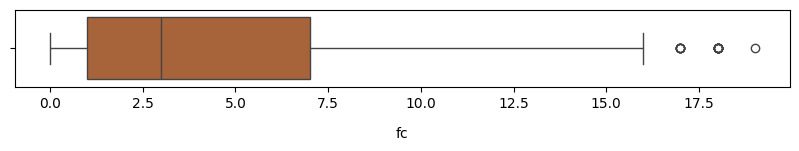

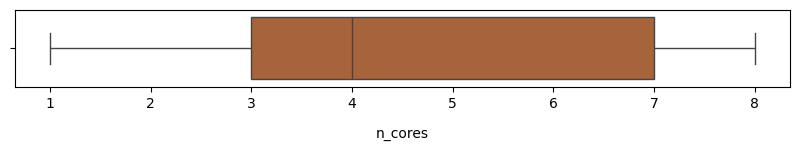

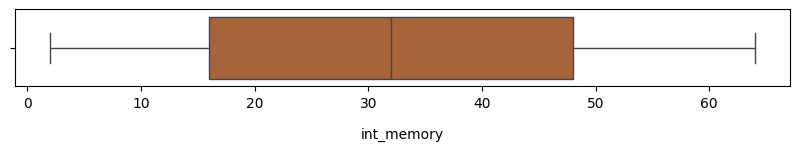

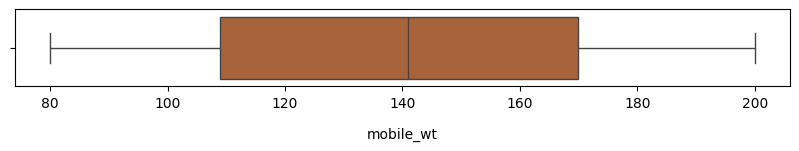

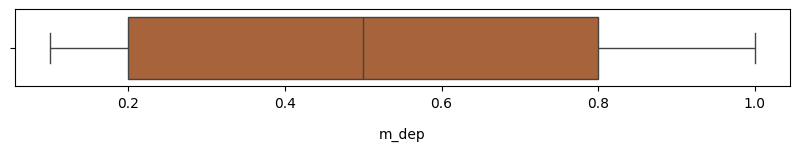

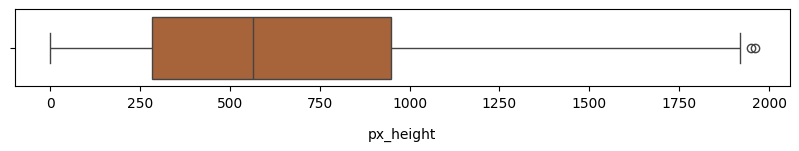

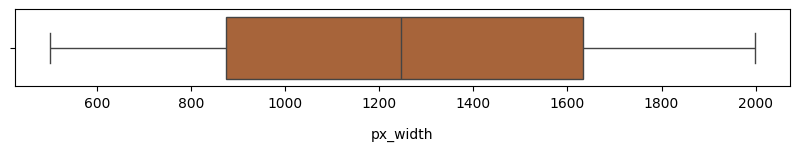

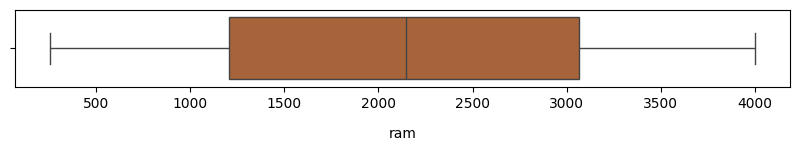

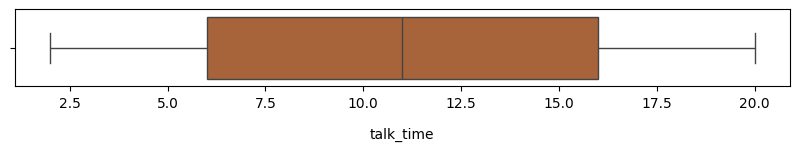

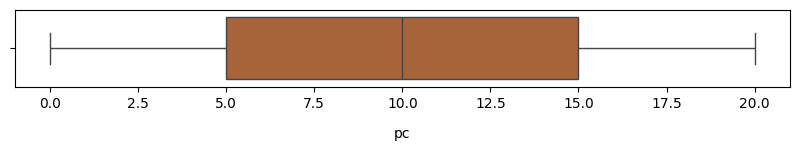

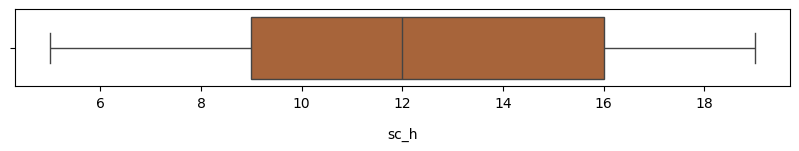

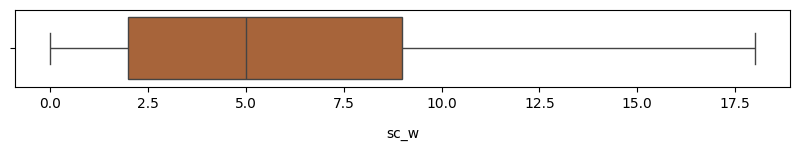

In [ ]:
# Memeriksa noise di dalam kontinyu :

palette = ['#DEE0D5' ,'#A7C5C5' ,  '#E2AC48' , '#B96028' , '#983C2D']

#Merencanakan distribusi dan rentang setiap kolom
plt.figure(figsize = (10,10))
plt.title("Range and Distribution of each continuous column")
plt.xticks(rotation=45)
df_cont1 = df[continuous1]
sns.stripplot( data = df_cont1  , palette= palette )
plt.show()

print('\n')

plt.figure(figsize = (10,10))
plt.title("Range and Distribution of each continuous column")
plt.xticks(rotation=45)
df_cont2 = df[continuous2]
sns.stripplot( data = df_cont2  , palette = palette )
plt.show()

print('\n'*2)

#Box-plot setiap kolom
for i in continuous :
    plt.figure(figsize = (10,1))
    sns.boxplot(x = df[i] , color = '#B96028' , linewidth = 1)
    plt.xlabel(i, labelpad = 12)
    plt.show()
    print('\n'*1)

3. Visualization

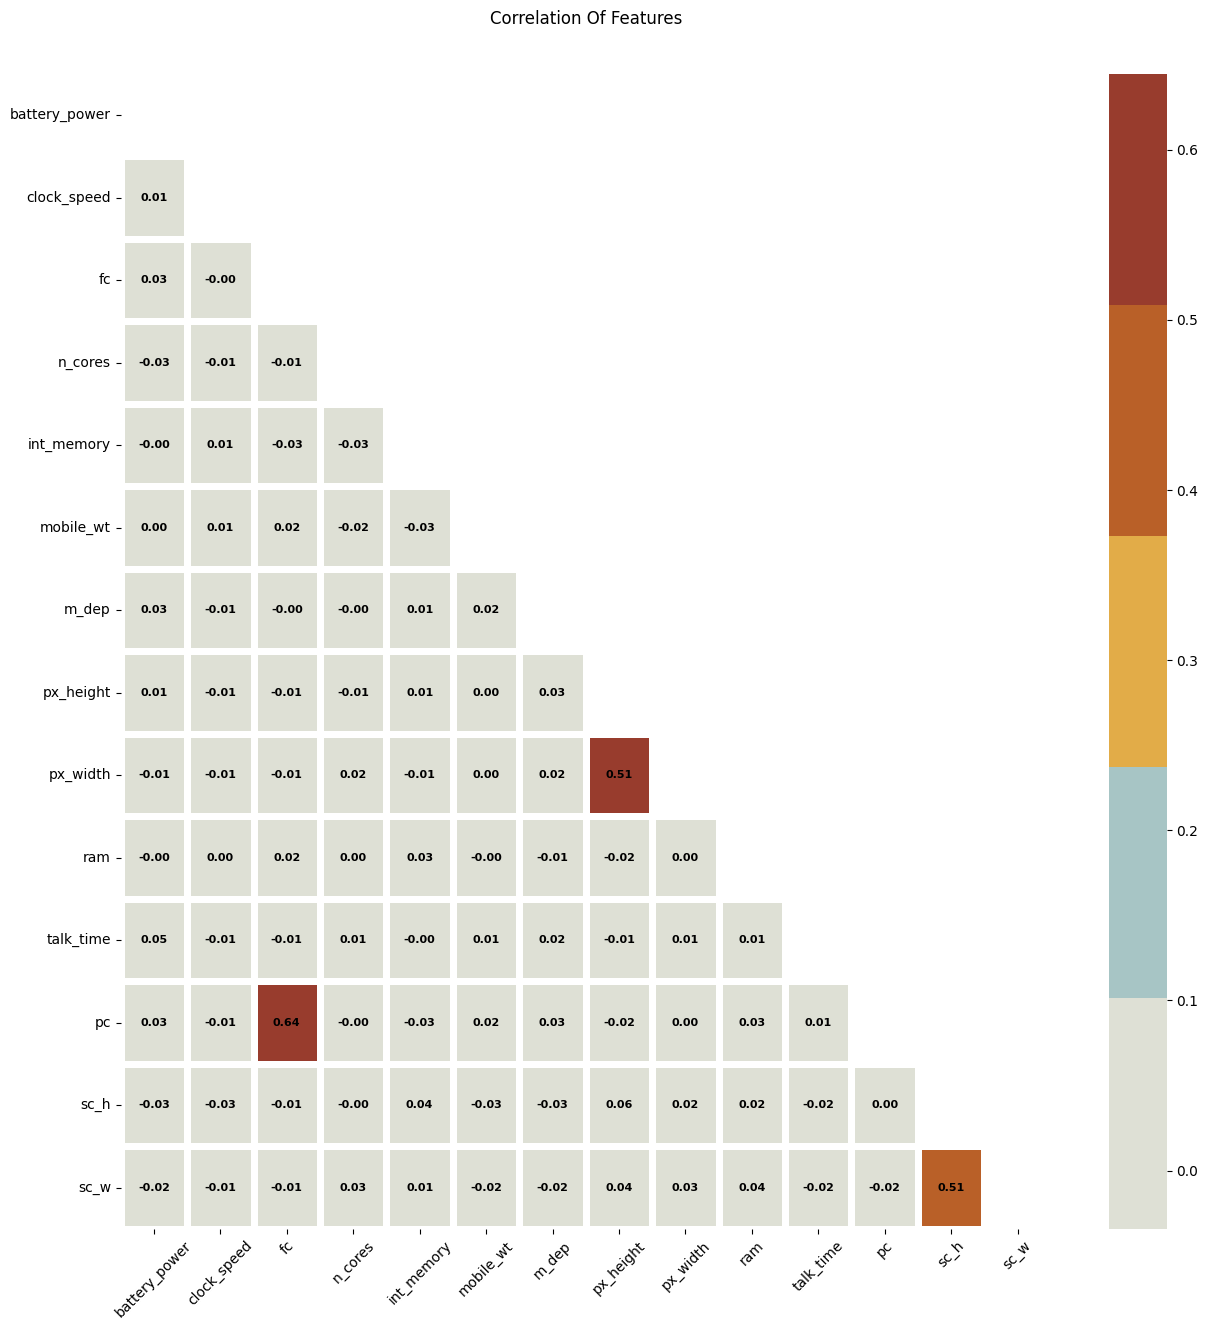

In [ ]:
#Korelasi antara fitur berkelanjutan

corr_matrix = df[continuous].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) #Mask the value under the diagonal



plt.figure(figsize=(15,15)) #Plotting the correlation map
colormap = ['#DEE0D5' ,'#A7C5C5' ,  '#E2AC48' , '#B96028' , '#983C2D']
#colormap = ['#d80032'   , '#edf2f4' , '#ef233c' , '#d80032' , '#8d99ae' , '#2b2d42']
# colormap.reverse()
sns.heatmap(corr_matrix , cmap = colormap , annot = True , linewidths = 5 , mask = mask , fmt = ".2f" , annot_kws={"size": 8, "weight": "bold", "color": "black"})
plt.title("Correlation Of Features\n\n" )
plt.xticks(rotation = 45)
plt.yticks(rotation = 360)
plt.show()

4. Modeling

In [ ]:
#fitur normalisasi

features = ['battery_power' ,'blue', 'clock_speed' ,'dual_sim' , 'fc' , 'four_g', 'int_memory' ,  'm_dep' ,'mobile_wt'  , 'n_cores' , 'pc',
            'px_height' , 'px_width' , 'ram' ,'sc_h' , 'sc_w' ,'talk_time' ,'three_g' , 'touch_screen' , 'wifi']
scaler = MinMaxScaler(feature_range = (1,2))
norm = scaler.fit_transform(df[features]) #Normalizing
df_norm = pd.DataFrame(norm , columns = features) #Convert it into dataframe
df_norm.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1.492664,0.293533,1.0,1.234302,1.484302,1.744322,2.0
blue,2000.0,1.495000,0.500100,1.0,1.000000,1.000000,2.000000,2.0
clock_speed,2000.0,1.408900,0.326402,1.0,1.080000,1.400000,1.680000,2.0
dual_sim,2000.0,1.509500,0.500035,1.0,1.000000,2.000000,2.000000,2.0
fc,2000.0,1.226816,0.228497,1.0,1.052632,1.157895,1.368421,2.0
four_g,2000.0,1.521500,0.499662,1.0,1.000000,2.000000,2.000000,2.0
int_memory,2000.0,1.484621,0.292673,1.0,1.225806,1.483871,1.741935,2.0
m_dep,2000.0,1.446389,0.320462,1.0,1.111111,1.444444,1.777778,2.0
mobile_wt,2000.0,1.502075,0.294997,1.0,1.241667,1.508333,1.750000,2.0
n_cores,2000.0,1.502929,0.326834,1.0,1.285714,1.428571,1.857143,2.0


In [ ]:
#Memisahkan X dan Y
x = df_norm
y = df['price_range'].values.reshape(-1, 1)
y = y.astype('int')

In [ ]:
#Menguji proporsi train data yang berbeda
def Split_size(x , y , Model):

    test_size = [0.1 , 0.15 , 0.2 , 0.25 , 0.3 , 0.35]
    score = []
    for size in test_size:

        X_train, X_test, y_train, y_test = train_test_split (x, y, test_size = size, random_state = 0)
        if Model=='DTC' :
            classifier = DecisionTreeClassifier(max_depth = 7 , random_state = 0) #Creating model with the best parametere
        elif Model=='RFC':
            classifier = RandomForestClassifier(n_estimators = 100 , max_depth = 7 , random_state = 0) #Creating model with the best parametere
        else :
            classifier = SVC() #Creating model with the best parametere

        classifier.fit (X_train, y_train)
        score.append (classifier.score(X_test, y_test))

    Scores = pd.DataFrame({'Test size': test_size, 'Score': score})
    Scores.sort_values(by = ['Score'] , ascending = False, inplace = True)
    display(Scores)

In [ ]:
def fit_evaluate(Model , x_train , y_train , x_test , y_test, param):

    #Creating a model based on the best hyper parameter :
    if Model=='DTC' :
        classifier = DecisionTreeClassifier(**param) #Creating model with the best parametere
    elif Model=='RFC':
        param['min_samples_leaf'] = 10
        classifier = RandomForestClassifier(**param) #Creating model with the best parametere
    else :
        classifier = SVC(**param) #Creating model with the best parametere


    classifier.fit (x_train , y_train.ravel()) # fiting the model
    y_pred = classifier.predict (x_test) # predicting
    y_pred_train = classifier.predict (x_train)

    #Evaluating with different metrics :
    print ("\033[31mTrain Accuracy: " , metrics.accuracy_score (y_train , y_pred_train))
    print ("Test Accuracy: " , metrics.accuracy_score (y_test , y_pred))
    print ("F1 Score: ", f1_score (y_test , y_pred , average = "macro"))
    print ("Precision Score: ", precision_score (y_test , y_pred , average = "macro" ))
    print ("Recall Score: ", recall_score (y_test , y_pred , average = "macro" ))
    print ('\n\33[33m',classification_report (y_test , y_pred))

    #plotting confusion matrix
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))
    cm_display.plot(colorbar=False, cmap = 'Oranges')
    plt.title('Confusion Matrix')
    plt.show()

In [ ]:
def GSCV(Model , model , grid , x , y , test_size):

    x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = test_size , random_state = 0) #spliting data

    grid_search = GridSearchCV (estimator = model , param_grid = grid , n_jobs = -1 , cv = 5 ,
                            scoring = ['accuracy', 'recall_macro' , 'precision_macro' , 'f1_macro'],
                            error_score = 0 , refit = 'accuracy')  #Defining grid search

    grid_search.fit (x_train , y_train) #Fitting grid search

    results = grid_search.cv_results_ #Getting the result
    df_results = pd.DataFrame(results) #Turning the result into a DF

    param = grid_search.best_params_ #getting the best params

    columns_result = ['params' , 'rank_test_accuracy' , 'mean_test_accuracy' ,  'mean_test_f1_macro' ,
                      'mean_test_precision_macro' , 'mean_test_recall_macro' ] #Desired column out of dataframe

    df_results = df_results[columns_result] #Filtering the result
    df_results = df_results.sort_values(by = 'rank_test_accuracy') #Sorting based on refitted metric

    params ={}
    for arg in param : #creating the param kwarg to pass it to 'fit_evaluate' function
        key = arg.split('classifier__')
        params[key[1]] = param[arg]
    params['random_state'] = 0 #adding random_state


    display(df_results.head(10).style.highlight_max(color = '#fca311', axis = 0 , subset = df_results.columns[3:])) #highlighting best results


    fit_evaluate(Model , x_train , y_train , x_test , y_test , params) #Evaluationg Model

In [ ]:
#Defining a model pipeline withh different parameters

model = Pipeline([
        ('classifier', DecisionTreeClassifier())
])

grid_params = { 'classifier__criterion' : ['gini' , 'entropy' , 'log_loss'],
               'classifier__max_depth' : [3,5,7,9,11,13,15,17,19]
              }


df_GS = GSCV('DTC' , model , grid_params , x , y  , 0.15) #Performing grid search cv and evaluating model using the best fit

5. Random Forest

In [ ]:
Split_size(x, y , 'RFC') #Memilih test_size terbaik

,Test size,Score
2,0.20,0.870000
5,0.35,0.865714
1,0.15,0.863333
4,0.30,0.848333
0,0.10,0.845000
3,0.25,0.842000


,params,rank_test_accuracy,mean_test_accuracy,mean_test_f1_macro,mean_test_precision_macro,mean_test_recall_macro
50,"{'classifier__criterion': 'entropy', 'classifier__max_depth': 11, 'classifier__n_estimators': 250}",1,0.871875,0.871389,0.873561,0.872251
73,"{'classifier__criterion': 'log_loss', 'classifier__max_depth': 10, 'classifier__n_estimators': 100}",2,0.871250,0.870711,0.873114,0.871624
83,"{'classifier__criterion': 'log_loss', 'classifier__max_depth': 12, 'classifier__n_estimators': 500}",3,0.870000,0.869466,0.871662,0.870397
74,"{'classifier__criterion': 'log_loss', 'classifier__max_depth': 10, 'classifier__n_estimators': 250}",4,0.869375,0.869180,0.870903,0.869766
38,"{'classifier__criterion': 'entropy', 'classifier__max_depth': 7, 'classifier__n_estimators': 250}",5,0.868750,0.868068,0.869486,0.869171
51,"{'classifier__criterion': 'entropy', 'classifier__max_depth': 11, 'classifier__n_estimators': 500}",6,0.868125,0.867021,0.868952,0.868585
43,"{'classifier__criterion': 'entropy', 'classifier__max_depth': 9, 'classifier__n_estimators': 500}",7,0.866875,0.866559,0.868951,0.867241
47,"{'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__n_estimators': 500}",8,0.866250,0.866068,0.868090,0.866638
78,"{'classifier__criterion': 'log_loss', 'classifier__max_depth': 11, 'classifier__n_estimators': 250}",9,0.866250,0.865919,0.868248,0.866617
75,"{'classifier__criterion': 'log_loss', 'classifier__max_depth': 10, 'classifier__n_estimators': 500}",10,0.865625,0.865302,0.868068,0.866014


Train Accuracy:  0.964375
Test Accuracy:  0.8825
F1 Score:  0.8792575071986837
Precision Score:  0.8793834123574286
Recall Score:  0.8800212173764859

               precision    recall  f1-score   support

           0       0.93      0.98      0.95       107
           1       0.81      0.82      0.81        93
           2       0.84      0.78      0.81       101
           3       0.94      0.94      0.94        99

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



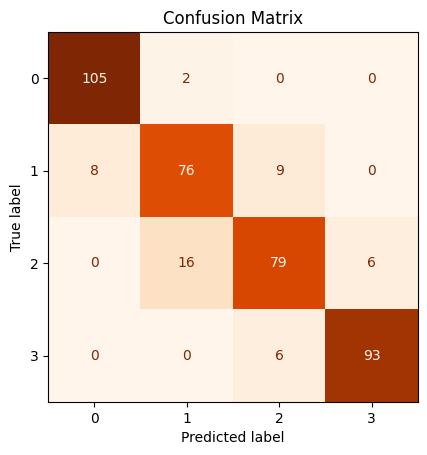

In [ ]:
#Mendefinisikan model pipeline dengan parameter berbeda

model = Pipeline([
        ('classifier', RandomForestClassifier(min_samples_leaf = 10))
])
grid_params = { 'classifier__criterion' : ['gini' , 'entropy' , 'log_loss'],
               'classifier__max_depth' : [3,5,7,9,10,11,12],
               'classifier__n_estimators' : [50 , 100 , 250 , 500]
              }

df_GS = GSCV('RFC' , model , grid_params , x , y.ravel() , 0.2 ) #Performing grid search cv and evaluating model using the best fit